# Working

In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("src/")

In [2]:

from src.data import get_track , getBatch
from src.model import PCT_Transformer
import glob
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
import matplotlib
plt.style.use("seaborn")
matplotlib.rcParams["axes.titlesize"] = 20
matplotlib.rcParams["axes.labelsize"] = 20 
matplotlib.rcParams["xtick.labelsize"] = 20
matplotlib.rcParams["ytick.labelsize"] = 20
matplotlib.rcParams["legend.fontsize"] = 20
matplotlib.rcParams["figure.figsize"] = (10,10)
matplotlib.rcParams["axes.grid"] = True

In [4]:
aPaths = glob.glob("data/*AllPSA.npy")
hpaths = glob.glob("data/*.hits.npy")
ap = np.random.choice(aPaths)
hp = np.random.choice(hpaths)
trk =  get_track(apth=ap,hpth=hp)
batch = getBatch(trk,batch_size=32)
X = batch[:,:,2:5]
Y = batch[:,:,5:]
model = PCT_Transformer()

# Experiment

In [13]:
model.compile(optimizer = tf.keras.optimizers.Adam(),loss = tf.keras.losses.CategoricalCrossentropy(from_logits=False))

In [4]:
trainDate = "2023_05_12-14_27_"
predictions = np.load(f"preds/{trainDate}preds.npy")
targets = np.load(f"preds/{trainDate}targets.npy")
loss = np.load(f"losses/{trainDate}loss.npy")
val_loss = np.load(f"losses/{trainDate}valloss.npy")

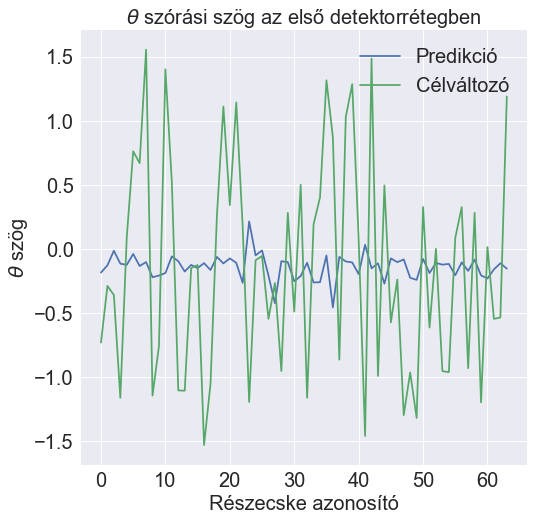

In [13]:
epochindex = -1
layid = -1

y1 = targets[epochindex,:,-layid,0].reshape(-1)
x1 = predictions[epochindex,layid,:,0].reshape(-1)

y2 = targets[epochindex,:,-layid,1].reshape(-1)
x2 = predictions[epochindex,layid,:,1].reshape(-1)

y3 = targets[epochindex,:,-layid+1,2].reshape(-1)
x3 = predictions[epochindex,layid-1,:,2].reshape(-1)

plt.figure(figsize=(8,8))
plt.title(r"$\theta$ szórási szög az első detektorrétegben")
plt.plot(x1,label="Predikció")
plt.plot(y1,label="Célváltozó")
plt.ylabel(r"$\theta$ szög")
plt.xlabel("Részecske azonosító")
plt.legend()


In [ ]:

plt.subplot(1,3,2)
plt.title("Phi angle")
plt.plot(x2,label="Predictions")
plt.plot(y2,label="Targets")
plt.legend()

plt.subplot(1,3,3)
plt.title("Ekine")
plt.plot(x3,label="Predictions")
plt.plot(y3,label="Targets")
plt.legend()


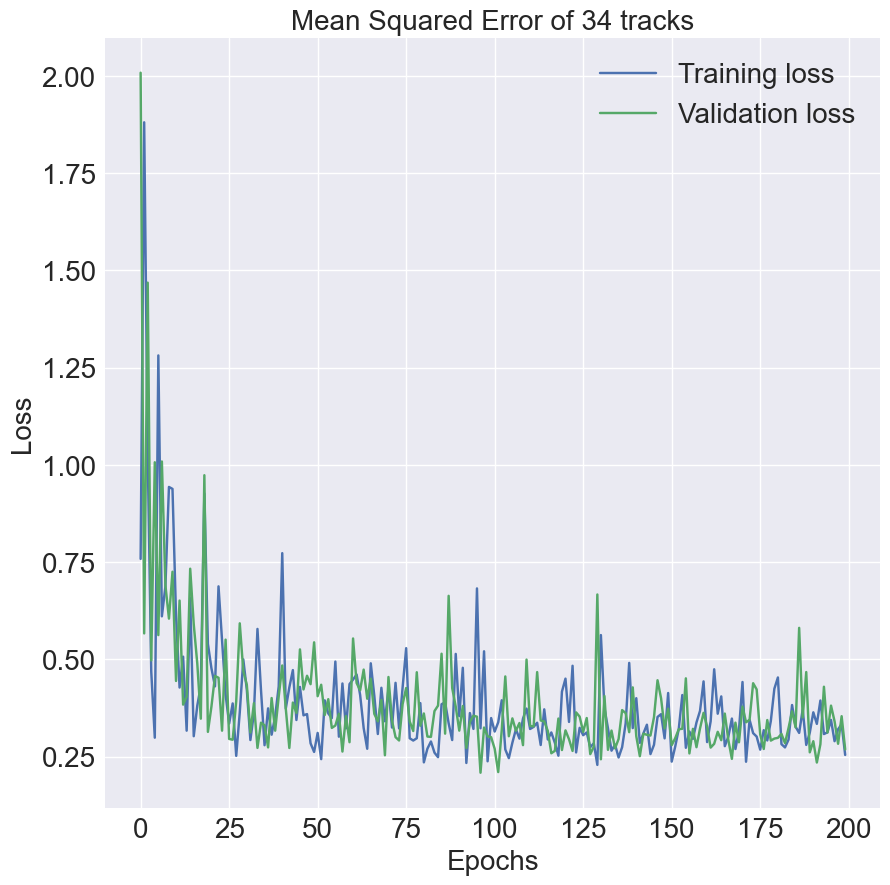

In [20]:
plt.title("Mean Squared Error of 34 tracks")
plt.plot(loss,label="Training loss",)
plt.plot(val_loss,label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
